## <center> Drink Menu Task  -  eT3 internship 2022<center>  

### Import needed libraries

In [119]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing  # This import for data standarization
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_log_error
plt.style.use('fivethirtyeight')

### Loading Data as DataFrame

In [120]:
dataset_path = 'F:\\eT3 Intership 2022 Task\\task\\Data-science task\\drinkMenu.csv'
df = pd.read_csv(dataset_path)

## Data Assessing
### Viewing Data

In [121]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


### Checking for columns types

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

### Checking for null values

In [123]:
df.isna().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

### Checking for Duplicates

In [124]:
print(df.duplicated().sum())

0


### Generate descriptive statistics

In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,242.0,193.871901,102.863303,0.0,120.0,185.0,260.00,510.0
Trans Fat (g),242.0,1.307025,1.640259,0.0,0.1,0.5,2.00,9.0
Saturated Fat (g),242.0,0.037603,0.071377,0.0,0.0,0.0,0.10,0.3
Sodium (mg),242.0,6.363636,8.630257,0.0,0.0,5.0,10.00,40.0
Total Carbohydrates (g),242.0,128.884298,82.303223,0.0,70.0,125.0,170.00,340.0
Cholesterol (mg),242.0,35.991736,20.795186,0.0,21.0,34.0,50.75,90.0
Dietary Fibre (g),242.0,0.805785,1.445944,0.0,0.0,0.0,1.00,8.0
Sugars (g),242.0,32.962810,19.730199,0.0,18.0,32.0,43.75,84.0
Protein (g),242.0,6.978512,4.871659,0.0,3.0,6.0,10.00,20.0


### Data Cleaning Step (Data Preparation)

### Change columns names to remove none alphabetic chars and being called easily

In [126]:
def renaming_columns(df):
    df.rename(columns={' Total Fat (g)': 'Total_Fat(g)',
                       'Trans Fat (g) ' : 'Trans_Fat(g)',
                       'Saturated Fat (g)' : 'Saturated_Fat(g)',
                       ' Sodium (mg)' : 'Sodium(mg)',
                       ' Total Carbohydrates (g) ' : 'Total_Carbohydrates(g)',
                       'Cholesterol (mg)' : 'Cholesterol(mg)',
                       ' Dietary Fibre (g)' : 'Dietary_Fibre(g)',
                       ' Sugars (g)' : 'Sugars(g)' , 
                       ' Protein (g) ' : 'Protein(g)' , 
                       'Vitamin A (% DV) ' : 'Vitamin_A' ,
                       'Vitamin C (% DV)' : 'Vitamin_C' ,
                       ' Calcium (% DV) ' : 'Calcium' , 
                       'Iron (% DV) ' : 'Iron' , 
                       'Caffeine (mg)' : 'Caffeine(mg)' , 
                       }, inplace=True )
    return df

df = renaming_columns(df)
df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total_Fat(g)', 'Trans_Fat(g)', 'Saturated_Fat(g)', 'Sodium(mg)',
       'Total_Carbohydrates(g)', 'Cholesterol(mg)', 'Dietary_Fibre(g)',
       'Sugars(g)', 'Protein(g)', 'Vitamin_A', 'Vitamin_C', 'Calcium', 'Iron',
       'Caffeine(mg)'],
      dtype='object')

### Convert Percentage String to Numeric in (Vitamin A, Vitamin C, Calcium, Iron)  columns


In [127]:
def convert_Perc_String_to_Numeric(columns):
    for column in columns:
        df[column] = df[column].str.rstrip("%").astype(float)/100
    return df[columns]
    

converted_columns = ['Vitamin_A' , 'Vitamin_C' , 'Calcium' , 'Iron']
df[converted_columns] = convert_Perc_String_to_Numeric(converted_columns)
df[converted_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Vitamin_A  242 non-null    float64
 1   Vitamin_C  242 non-null    float64
 2   Calcium    242 non-null    float64
 3   Iron       242 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


### Handling null values in Caffiene(mg) column with mode

In [128]:
df['Caffeine(mg)'] = df['Caffeine(mg)'].fillna(df['Caffeine(mg)'].mode()[0])
df['Caffeine(mg)'].isna().sum()

0

### Remove special chars in ['Beverage' , 'Beverage_category' , 'Beverage_prep'] column to be clear

In [129]:
def remove_special_char(column , df):
    df[column] = df[column].str.replace("أ¨","")
    df[column] = df[column].str.replace("آ®","")
    df[column] = df[column].str.replace("®","")
    return df[column]

df['Beverage_category'] = remove_special_char('Beverage_category' , df)
df['Beverage'] = remove_special_char('Beverage' , df)
df['Beverage_prep'] = remove_special_char('Beverage_prep' , df)


In [130]:
print(df.Beverage_category.unique())
print('==========================================================================')
print(df.Beverage.unique())
print('==========================================================================')
print(df.Beverage_prep.unique())

['Coffee' 'Classic Espresso Drinks' 'Signature Espresso Drinks'
 'Tazo Tea Drinks' 'Shaken Iced Beverages' 'Smoothies'
 'Frappuccino Blended Coffee' 'Frappuccino Light Blended Coffee'
 'Frappuccino Blended Crème']
['Brewed Coffee' 'Caffè Latte' 'Caffè Mocha (Without Whipped Cream)'
 'Vanilla Latte (Or Other Flavoured Latte)' 'Caffè Americano' 'Cappuccino'
 'Espresso' 'Skinny Latte (Any Flavour)' 'Caramel Macchiato'
 'White Chocolate Mocha (Without Whipped Cream)'
 'Hot Chocolate (Without Whipped Cream)'
 'Caramel Apple Spice (Without Whipped Cream)' 'Tazo Tea'
 'Tazo Chai Tea Latte' 'Tazo Green Tea Latte' 'Tazo Full-Leaf Tea Latte'
 'Tazo Full-Leaf Red Tea Latte (Vanilla Rooibos)'
 'Iced Brewed Coffee (With Classic Syrup)'
 'Iced Brewed Coffee (With Milk & Classic Syrup)'
 'Shaken Iced Tazo Tea (With Classic Syrup)'
 'Shaken Iced Tazo Tea Lemonade (With Classic Syrup)'
 'Banana Chocolate Smoothie' 'Orange Mango Banana Smoothie'
 'Strawberry Banana Smoothie' 'Coffee' 'Mocha (Without Whi

### I will remove ['Beverage'] column because it is similar with ['Beverage_Category']

In [131]:
df = df.drop(columns=['Beverage'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Beverage_category       242 non-null    object 
 1   Beverage_prep           242 non-null    object 
 2   Calories                242 non-null    int64  
 3   Total_Fat(g)            242 non-null    object 
 4   Trans_Fat(g)            242 non-null    float64
 5   Saturated_Fat(g)        242 non-null    float64
 6   Sodium(mg)              242 non-null    int64  
 7   Total_Carbohydrates(g)  242 non-null    int64  
 8   Cholesterol(mg)         242 non-null    int64  
 9   Dietary_Fibre(g)        242 non-null    int64  
 10  Sugars(g)               242 non-null    int64  
 11  Protein(g)              242 non-null    float64
 12  Vitamin_A               242 non-null    float64
 13  Vitamin_C               242 non-null    float64
 14  Calcium                 242 non-null    fl

In [132]:
df.to_csv("F:\\eT3 Intership 2022 Task\\task\\Data-science task\\Preprocessed_Data.csv")

## Multivariate EDA
### Generate Correlation matrix with all features

In [133]:
df.corr().style.background_gradient()

,Calories,Trans_Fat(g),Saturated_Fat(g),Sodium(mg),Total_Carbohydrates(g),Cholesterol(mg),Dietary_Fibre(g),Sugars(g),Protein(g),Vitamin_A,Vitamin_C,Calcium,Iron
Calories,1.000000,0.642818,0.331047,0.387892,0.795037,0.940034,0.384292,0.909675,0.578453,0.406820,0.215433,0.518720,0.427153
Trans_Fat(g),0.642818,1.000000,0.694871,0.707794,0.524176,0.439811,0.131267,0.419887,0.496317,0.305293,-0.048238,0.489494,0.344880
Saturated_Fat(g),0.331047,0.694871,1.000000,0.920077,0.238142,0.161791,-0.093783,0.179255,0.287532,0.251557,-0.043146,0.287097,-0.066863
Sodium(mg),0.387892,0.707794,0.920077,1.000000,0.290295,0.199477,-0.060154,0.205969,0.496233,0.459001,0.023867,0.462052,-0.101201
Total_Carbohydrates(g),0.795037,0.524176,0.238142,0.290295,1.000000,0.766654,0.173378,0.771407,0.410629,0.311687,0.016623,0.404887,0.306757
Cholesterol(mg),0.940034,0.439811,0.161791,0.199477,0.766654,1.000000,0.342040,0.984196,0.360449,0.242821,0.223852,0.263574,0.356257
Dietary_Fibre(g),0.384292,0.131267,-0.093783,-0.060154,0.173378,0.342040,1.000000,0.184171,0.540274,0.280673,0.709267,0.147316,0.584519
Sugars(g),0.909675,0.419887,0.179255,0.205969,0.771407,0.984196,0.184171,1.000000,0.263061,0.188738,0.118918,0.236040,0.260414
Protein(g),0.578453,0.496317,0.287532,0.496233,0.410629,0.360449,0.540274,0.263061,1.000000,0.799796,0.360997,0.839942,0.358413
Vitamin_A,0.406820,0.305293,0.251557,0.459001,0.311687,0.242821,0.280673,0.188738,0.799796,1.000000,0.313781,0.714176,0.184129


## Notes From Correlation matrix
### 1. There is a strong relation between Cholesterol(mg) and Calories
### 2. There is a strong relation between Cholesterol(mg) and Sugars(g)

### Relation between Sugars and Cholesterol

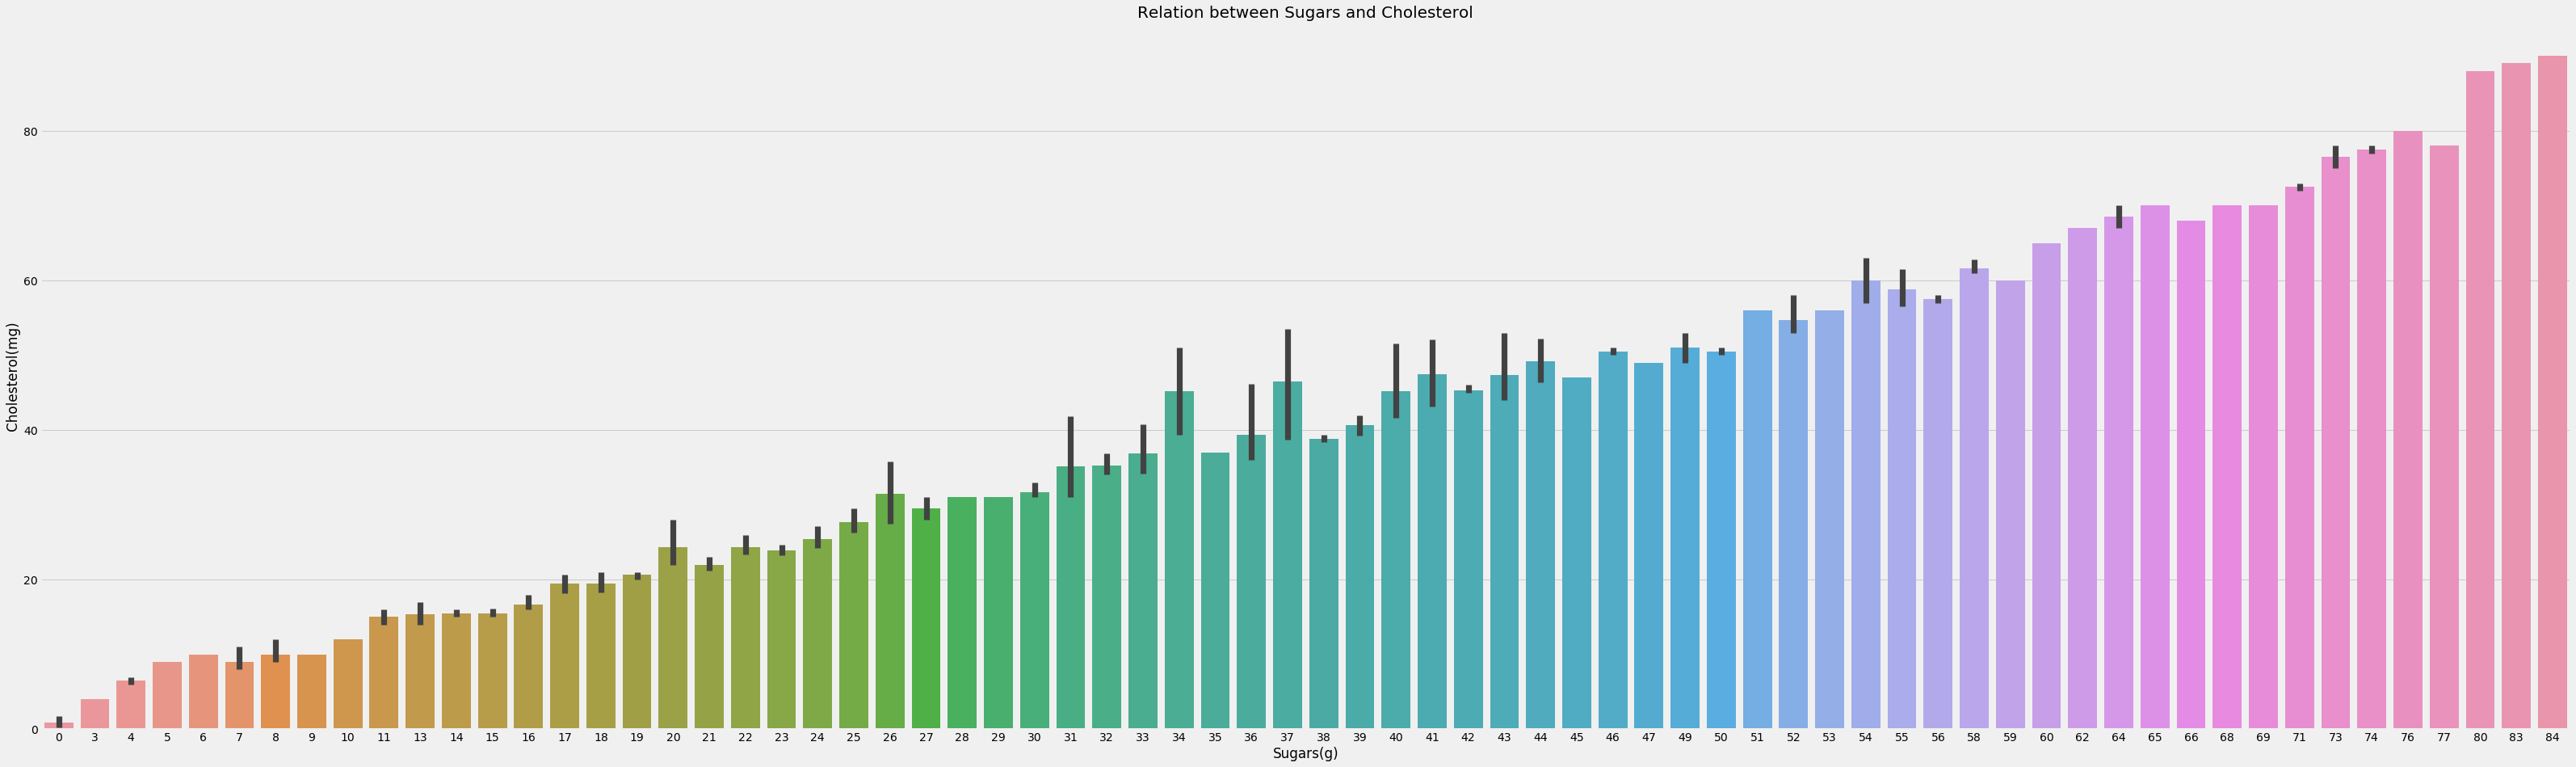

In [147]:
def barplot_between_2features(x,y,title):
    fig , ax = plt.subplots( figsize = (50,15) )
    sns.barplot( data = df , x = x , y = y)
    ax.set_title( title , fontsize = 20)
    plt.show()

barplot_between_2features('Sugars(g)' , 'Cholesterol(mg)', 'Relation between Sugars and Cholesterol')

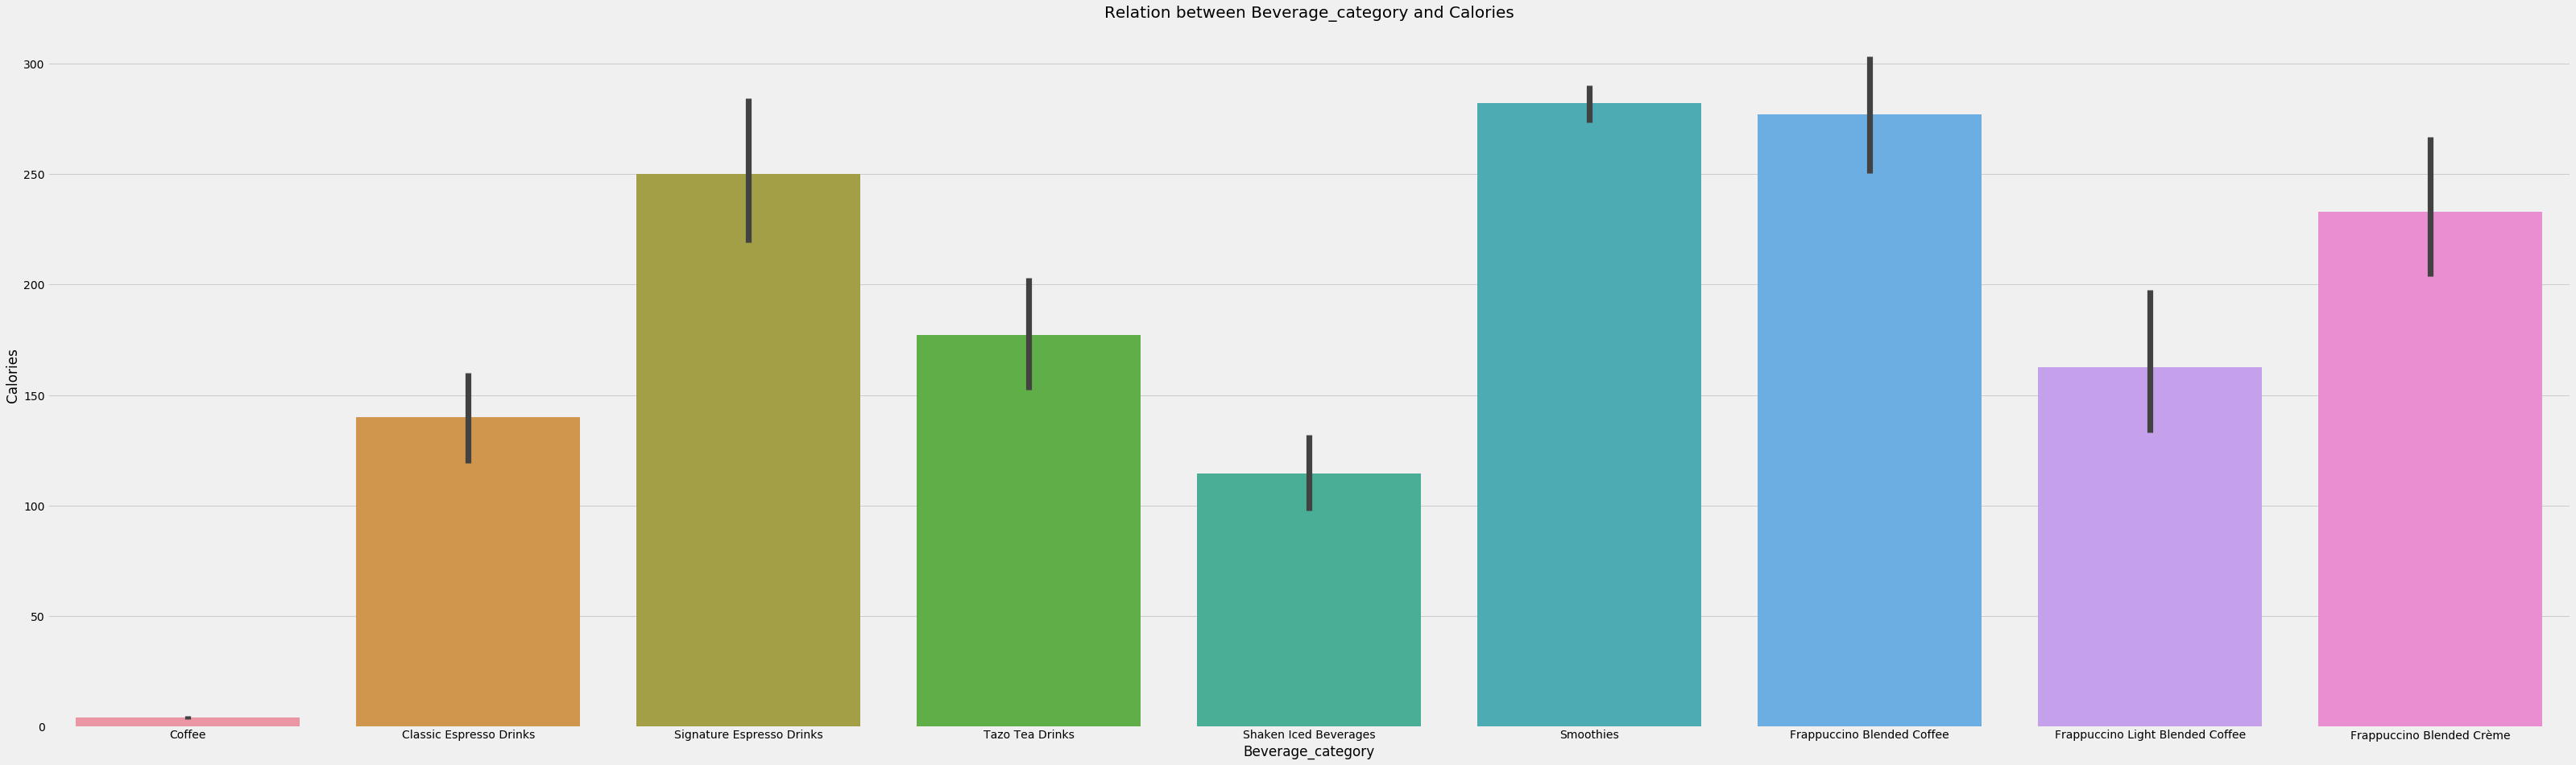

In [148]:
barplot_between_2features('Beverage_category' , 'Calories', 'Relation between Beverage_category and Calories')

### <center> Q1. Which drink has the highest calories from the dataset? <center>

### From last visualization: noticed that 

### <center> have the highest calories <center>

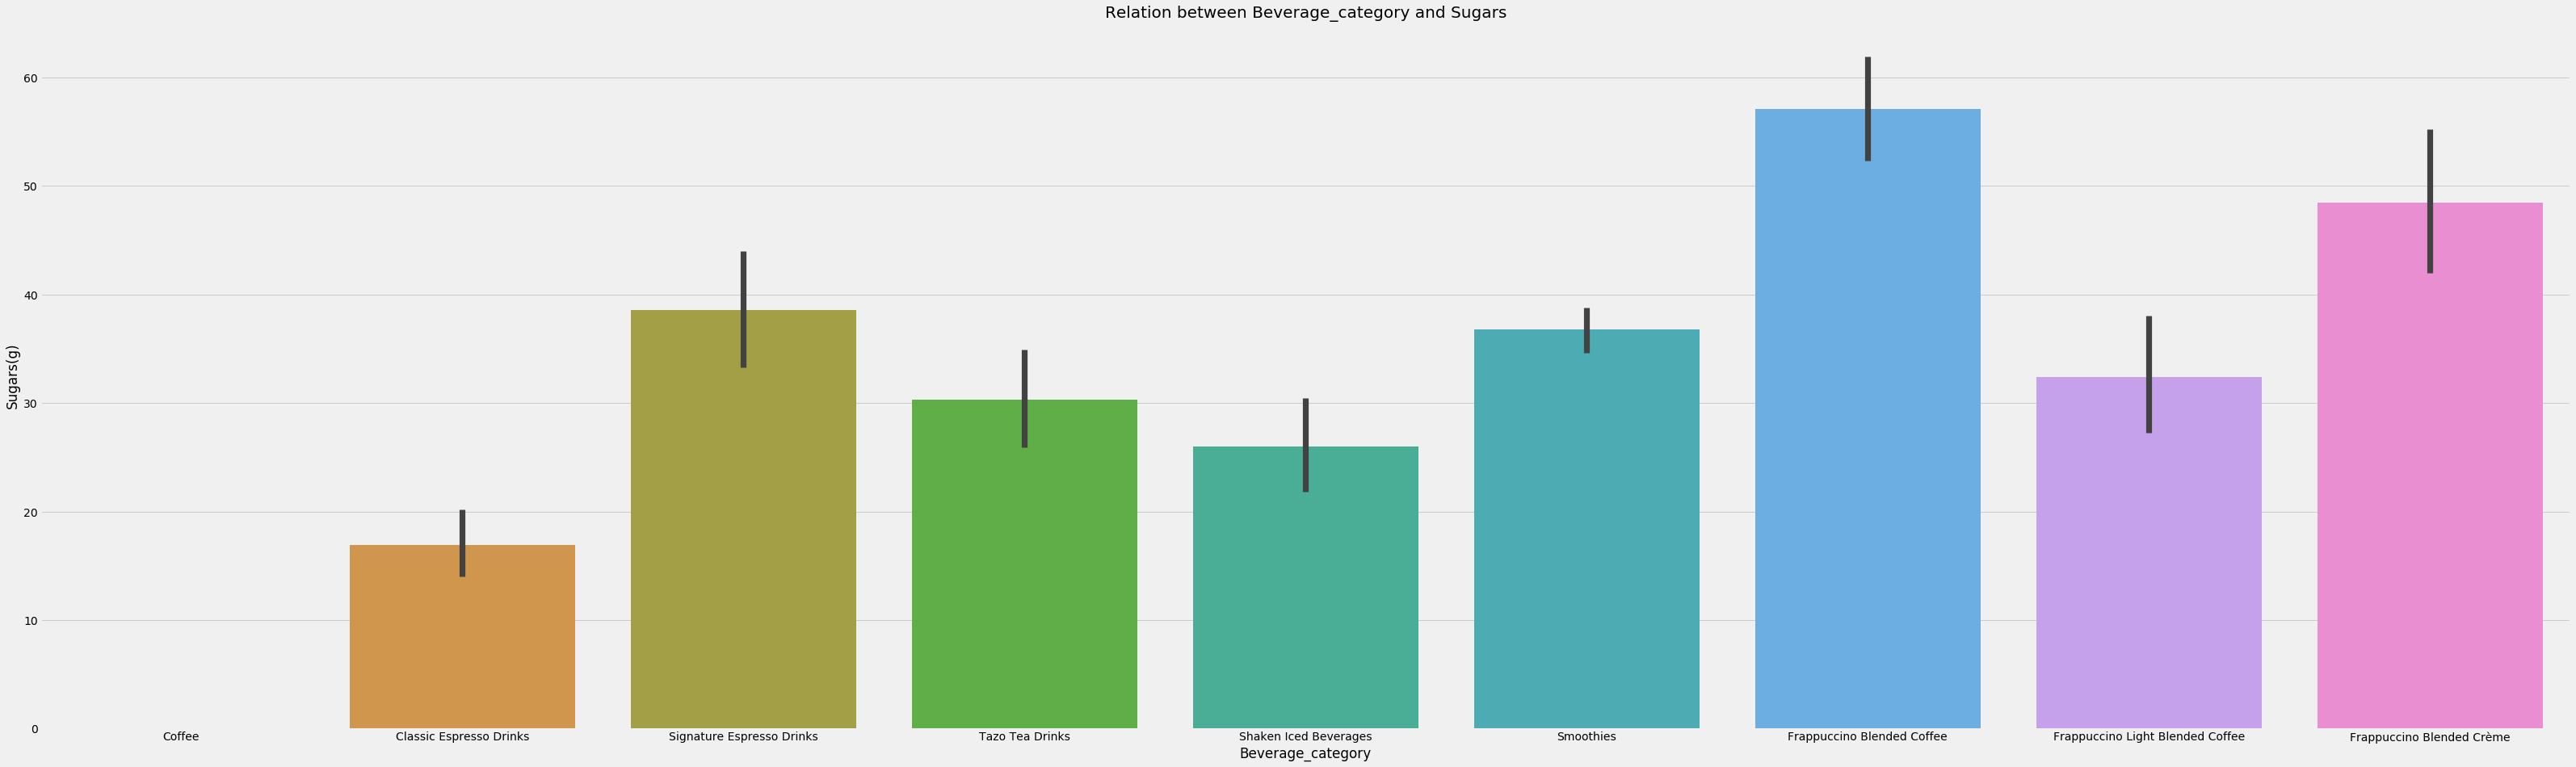

In [151]:
barplot_between_2features('Beverage_category' , 'Sugars(g)', 'Relation between Beverage_category and Sugars')

## <center> Q2. Highest Sugar Drink ? <center>

 
### <center> have highest sugar <center>

#### Finished, Thanks so much and waiting for your feedback ☺️	